In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
from z3 import *
from IPython.display import Markdown,display,IFrame,HTML,Image
import requests
from bs4 import BeautifulSoup

### Puzzle as published 
https://www.janestreet.com/puzzles/remote-sudoku-index/

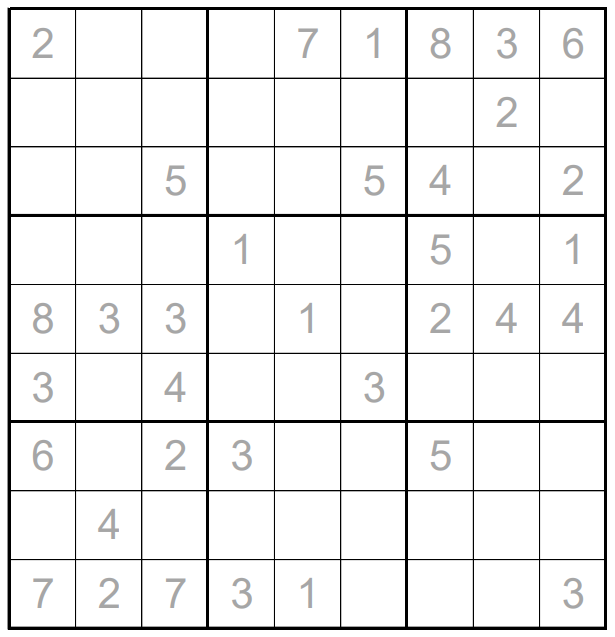

### Remote Sudoku

Fill each cell — even the ones with grey numbers — with a digit between 1 and 9
so that each row, column, and outlined 3-by-3 squares contains each digit once.
A grey number
N
indicates that there is an
N
exactly
N
squares away
(horizontally or vertically).
The answer to this month’s puzzle is the sum of the squares of the numbers
written over the gray numbers in the completed grid.
(For example, if a 7 is written over one of the grey numbers, that would
contribute 49 towards the sum.)

In [22]:
url='https://www.janestreet.com/puzzles/remote-sudoku-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Puzzle as published \n'+url))
y =[text for text in soup.body.stripped_strings]
#display([(i,j) for i,j in enumerate(y)])
display(Image('https://www.janestreet.com/puzzles/20190401_remote_sudoku.png',width=400))
display(Markdown("### "+y[8]+"\n\n"+str("\n".join(y[11:21]))))

In [7]:
fixed = np.array([[2, 0, 0, 0, 7, 1, 8, 3, 6],
                  [0, 0, 0, 0, 0, 0, 0, 2, 0],
                  [0, 0, 5, 0, 0, 5, 4, 0, 2],
                  [0, 0, 0, 1, 0, 0, 5, 0, 1],
                  [8, 3, 3, 0, 1, 0, 2, 4, 4],
                  [3, 0, 4, 0, 0, 3, 0, 0, 0],
                  [6, 0, 2, 3, 0, 0, 5, 0, 0],
                  [0, 4, 0, 0, 0, 0, 0, 0, 0],
                  [7, 2, 7, 3, 1, 0, 0, 0, 3]], dtype=int)

In [8]:
def sol_print(solution):
    x= np.ones((3,3))
    groups = np.block([[x*0, x*1, x*2], [x*3, x*4, x*5], [x*6, x*7, x*8]])
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    y = (fixed > 0) + groups*2
    ax = sns.heatmap(y, annot=solution, cbar=False, cmap="tab20", fmt="", linewidths=2, annot_kws={"size": 14})
    ax.axis("off")

<h3>Solution found in 0.118024 seconds</h3>

<h3>Answer is 1105</h3>

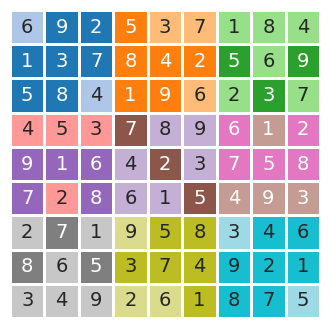

In [9]:
start = time.time()
s = Solver()
X = np.array(IntVector("x", 9**2), dtype=object).reshape((9, 9))

# standard rules
s += [And(e > 0, e <= 9) for _, e in np.ndenumerate(X)]
s += And([Distinct([e for (i, j), e in np.ndenumerate(X) if i == n]) for n in range(9)])
s += And([Distinct([e for (i, j), e in np.ndenumerate(X) if j == n]) for n in range(9)])
x = np.ones((3, 3))
groups = np.block([[x * 0, x * 1, x * 2], [x * 3, x * 4, x * 5], [x * 6, x * 7, x * 8]])
s += And([Distinct([e for (i, j), e in np.ndenumerate(X) if groups[i, j] == n]) for n in range(9)])

# remote constraint
def options(i, j, X, e):
    spots = [(0, -e), (0, e), (e, 0), (-e, 0)]
    return [X[i + x, j + y] for x, y in spots if 0 <= i + x < 9 and 0 <= j + y < 9]

s += [Or([a == int(e) for a in options(i, j, X, e)]) for (i, j), e in np.ndenumerate(fixed) if e > 0]

if s.check() == sat:
    m = s.model()
    evalu = np.vectorize(lambda x: m.evaluate(x).as_long())
    r = evalu(X)
    sol_print(r)
    sum = np.sum((r[fixed > 0] ** 2))
    display(Markdown(f"<h3>Solution found in {time.time() - start:.6f} seconds</h3>"))
    display(Markdown(f"<h3>Answer is {sum}</h3>"))
else:
    display(Markdown(f"<h3>Failed in {time.time() - start:.6f} seconds</h3>"))

### Solution as published
https://www.janestreet.com/puzzles/remote-sudoku-solution/

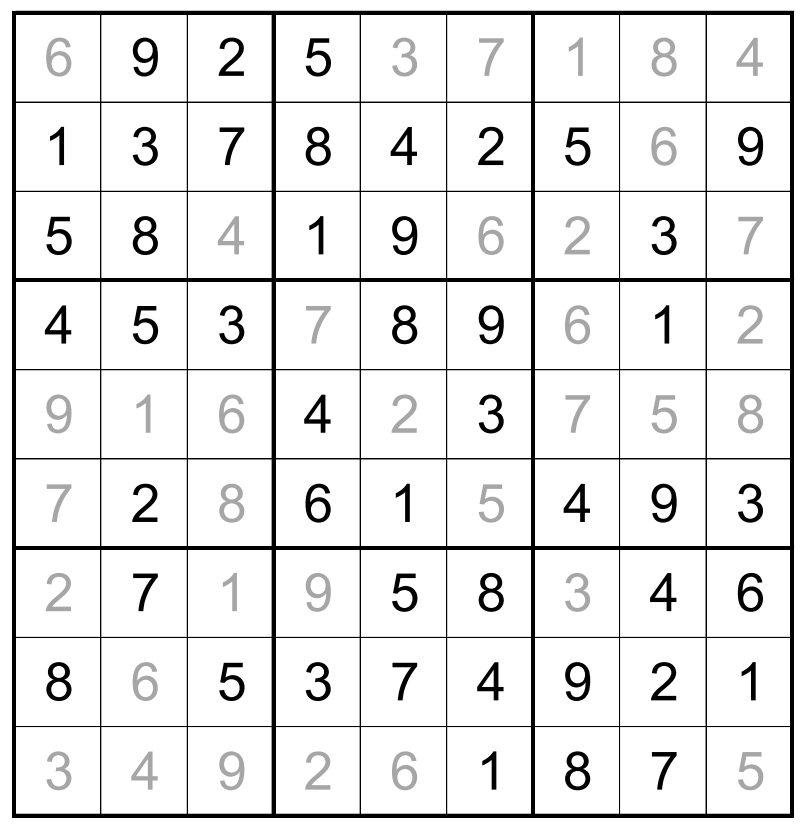

In [20]:
url='https://www.janestreet.com/puzzles/remote-sudoku-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Solution as published\n'+url))
display(Image("https://www.janestreet.com/puzzles/20190430_remote_sudoku_ans.png",width=300))
HTML(str(soup.find_all('div', {'class' :'col-12'})[4]))